# Spatial merge census and precinct data

This notebook will join precincts with  census data. 

 Spatial unit of analysis is the precinct. 
 The aim is to join census data to each precinct. The problem is the precinct and block group boundaries don't match up. 
 
 So, calculate census values for each precinct this way:

For each precinct, variable value is a weighted average of the values of the bg's with which that precinct overlaps. 

 x_A =  p_A1 \* x_1 + p_A2 \* x_2
 
 where
 
 x_A = variable x for precinct A, block group 1
 
 p_A1 = proportion of precinct A's area that is in block group 1
 

In [9]:
%matplotlib inline

from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
import pandas as pd
import spatial_processing_functions as spf
#import importlib


<module 'spatial_processing_functions' from '/Users/lisarayle/Dropbox/side_projects/sf_voting/src/spatial_processing_functions.py'>

In [2]:
# SF voting precincts. Boundaries are updated every ten years, and become active two years after the census. 
# We have 1992, 2002, and 2012. 
# years = ['1990','2000','2010','2009','2014']

# 1990 census data -> 1992 precinct + 1990 bg (missing)
# 2000, 2009 census data  -> 2002 precincts + 2000 bgs
# 2010, 2014 census data -> 2012 precincts + 2010 bgs

## Step 1: load precinct and census geography shapefiles

omitted 0 row(s) with missing geometry
586
omitted 0 row(s) with missing geometry
604
   ALAND00  AWATER00    BKGPIDFP00 BLKGRPCE00 COUNTYFP00 FUNCSTAT00  \
0   175140         0  060750330002          2        075          S   
1   582510      8871  060750330003          3        075          S   
2   237561         0  060750330004          4        075          S   
3   187672         0  060750331005          5        075          S   
4   220461         0  060750331004          4        075          S   

    INTPTLAT00    INTPTLON00 MTFCC00     NAMELSAD00 STATEFP00 TRACTCE00  \
0  +37.7400408  -122.4803382   G5030  Block Group 2        06    033000   
1  +37.7361646  -122.4823531   G5030  Block Group 3        06    033000   
2  +37.7351572  -122.4905505   G5030  Block Group 4        06    033000   
3  +37.7315153  -122.4957285   G5030  Block Group 5        06    033100   
4  +37.7316982  -122.4912766   G5030  Block Group 4        06    033100   

                                    

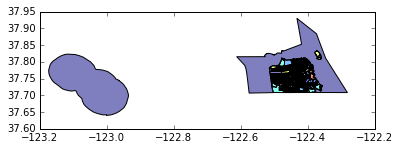

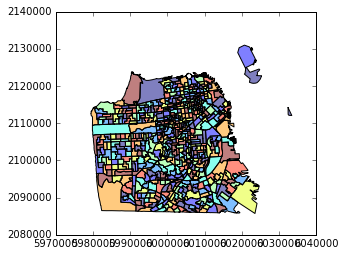

In [10]:

# try it out. 
for year in ['2002','2012']: 
    spf.load_prec_shp(year)    

for year in ['2000','2010']:
    spf.load_bg_shp(year)

   ALAND00  AWATER00    BKGPIDFP00 BLKGRPCE00 COUNTYFP00 FUNCSTAT00  \
0   175140         0  060750330002          2        075          S   
1   582510      8871  060750330003          3        075          S   
2   237561         0  060750330004          4        075          S   
3   187672         0  060750331005          5        075          S   
4   220461         0  060750331004          4        075          S   

    INTPTLAT00    INTPTLON00 MTFCC00     NAMELSAD00 STATEFP00 TRACTCE00  \
0  +37.7400408  -122.4803382   G5030  Block Group 2        06    033000   
1  +37.7361646  -122.4823531   G5030  Block Group 3        06    033000   
2  +37.7351572  -122.4905505   G5030  Block Group 4        06    033000   
3  +37.7315153  -122.4957285   G5030  Block Group 5        06    033100   
4  +37.7316982  -122.4912766   G5030  Block Group 4        06    033100   

                                            geometry         geoid  \
0  POLYGON ((546220.4056834313 4177022.741027943,...

Ring Self-intersection at or near point 550048.52970911062 4183089.8677463285
Ring Self-intersection at or near point 552255.16319397336 4178110.7456194456
Ring Self-intersection at or near point 544442.71665843052 4181270.9088203469
Ring Self-intersection at or near point 544053.45127179928 4178214.2207001671



cols not present
Index(['precname', 'area_m', 'ALAND00', 'AWATER00', 'BKGPIDFP00', 'BLKGRPCE00',
       'COUNTYFP00', 'FUNCSTAT00', 'INTPTLAT00', 'INTPTLON00', 'MTFCC00',
       'NAMELSAD00', 'STATEFP00', 'TRACTCE00', 'geoid', 'area_m_2', 'geometry',
       'intersect_area'],
      dtype='object')
   ALAND00  AWATER00    BKGPIDFP00 BLKGRPCE00 COUNTYFP00 FUNCSTAT00  \
0   175140         0  060750330002          2        075          S   
1   582510      8871  060750330003          3        075          S   
2   237561         0  060750330004          4        075          S   
3   187672         0  060750331005          5        075          S   
4   220461         0  060750331004          4        075          S   

    INTPTLAT00    INTPTLON00 MTFCC00     NAMELSAD00 STATEFP00 TRACTCE00  \
0  +37.7400408  -122.4803382   G5030  Block Group 2        06    033000   
1  +37.7361646  -122.4823531   G5030  Block Group 3        06    033000   
2  +37.7351572  -122.4905505   G5030  Block Grou

Ring Self-intersection at or near point 551953.0842455877 4184833.1744046635



cols not present
Index(['precname', 'sequenceid', 'area_m', 'ALAND00', 'AWATER00', 'BKGPIDFP00',
       'BLKGRPCE00', 'COUNTYFP00', 'FUNCSTAT00', 'INTPTLAT00', 'INTPTLON00',
       'MTFCC00', 'NAMELSAD00', 'STATEFP00', 'TRACTCE00', 'geoid', 'area_m_2',
       'geometry', 'intersect_area'],
      dtype='object')
   ALAND10   AWATER10 BLKGRPCE10 COUNTYFP10 FUNCSTAT10       GEOID10  \
0    79252          0          1        075          S  060750202001   
1    85767          0          4        075          S  060750201004   
2   118338          0          2        075          S  060750202002   
3  2720913  123838689          1        075          S  060750179021   
4    89671          0          1        075          S  060750203001   

    INTPTLAT10    INTPTLON10 MTFCC10     NAMELSAD10 STATEFP10 TRACTCE10  \
0  +37.7702785  -122.4240283   G5030  Block Group 1        06    020200   
1  +37.7645194  -122.4199518   G5030  Block Group 4        06    020100   
2  +37.7677687  -122.4243775

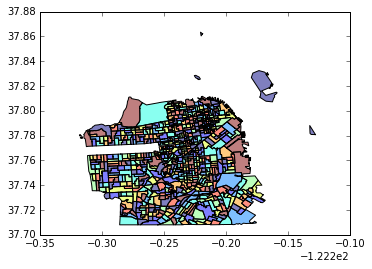

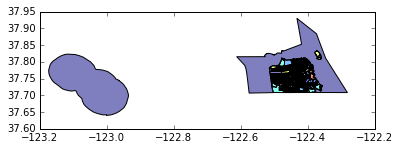

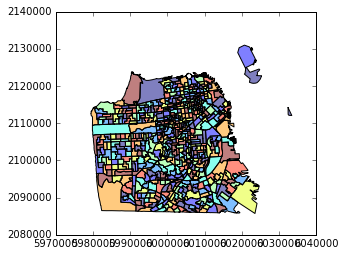

In [11]:
# We'll need the following combinations of censusXprecinct
#ce2000pre1992, ce2000pre2002, ce2007pre2002, ce2012pre2012  <- for census data
#'bg2000pre1992', 'bg2000pre2002', 'bg2010pre2012'  <- for block groups (since ce2007 data uses 2000 bg boundaries)

bgXprec = dict.fromkeys(['bg2000pre1992', 'bg2000pre2002', 'bg2010pre2012'])
for yr_key in bgXprec.keys():
    bgs = spf.load_bg_shp(yr_key[2:6])
    precincts = spf.load_prec_shp(yr_key[9:13])
    bgXprec[yr_key] = spf.merge_precinct_bg(precincts,bgs,yr_key)
    

#yr_key ='bg2010pre2012'
#bgs = load_bg_shp(yr_key[2:6])
#precincts = load_prec_shp(yr_key[9:13])
#bgXprec[yr_key] = merge_precinct_bg(precincts,bgs,yr_key)

In [12]:
bgXprec.keys()

dict_keys(['bg2000pre1992', 'bg2000pre2002', 'bg2010pre2012'])

## Merge with census data

In [13]:
# We'll need the following combinations of censusXprecinct
#ce2000pre1992, ce2000pre2002, ce2007pre2002, ce2012pre2012  <- for census data
#'bg2000pre1992', 'bg2000pre2002', 'bg2010pre2012'  <- for block groups


# dictionary for matching correct year. 
census2bg_year = {'1990':'1990', '2000':'2000','2010':'2010','2007':'2000','2012':'2010'}

ce2bgXpre={'ce2000pre1992':'bg2000pre1992','ce2000pre2002':'bg2000pre2002','ce2007pre2002':'bg2000pre2002','ce2012pre2012':'bg2010pre2012'}

In [14]:
# although we don't actually need 1990 data. 
# load census data, for each year. Then merge with the appropriate bg/precinct file. 
importlib.reload(spf)
census_data_by_precinct = dict.fromkeys(['ce2000pre1992', 'ce2000pre2002', 'ce2007pre2002', 'ce2012pre2012'])
for yr_key in census_data_by_precinct.keys():
    print('\n',yr_key)
    census_yr = yr_key[2:6]
    census_df = spf.load_census_data(census_yr)
    
    #lookup correct bgXprec dataframe to use.
    bg_key = ce2bgXpre[yr_key]
    
    # now merge. 
    df_merged = pd.merge(bgXprec[bg_key], census_df, on = 'geoid')
    #print(df_merged.columns)
    
    vars_to_use = spf.get_vars_to_use()
    cols_to_keep = vars_to_use + ['precname','area_m','intersect_area','geoid']
    df_merged = df_merged[cols_to_keep]
    df_merged_calc = spf.calc_variables(df_merged, vars_to_use) # leave off geo columns, obviously
    #print(df_merged_calc.columns)
    
    # aggregate back to precinct level. 
    df_new = spf.agg_vars_by_prec(df_merged_calc)
    
    # clean up by dropping unweighted and other unneeded columns
    df_new.drop(vars_to_use, axis=1, inplace=True)
    df_new.drop(['intersect_area','prop_area'], axis=1, inplace=True)
    df_new = spf.rename_wgt_cols(df_new, vars_to_use)
    #print(df_new.head())
    
    # store data frame in a dictionary
    census_data_by_precinct[yr_key] = df_new
    # also save as csv. 
    spf.save_census_data(df_new,yr_key)
    


 ce2000pre2002
something's wrong with these:
 precname
2009    0.968559
Name: prop_area, dtype: float64
saved as census_by_precinct_ce2000pre2002.csv

 ce2007pre2002
something's wrong with these:
 precname
2009    0.968559
Name: prop_area, dtype: float64
saved as census_by_precinct_ce2007pre2002.csv

 ce2000pre1992
something's wrong with these:
 precname
2002    0.935645
2005    0.914213
2014    0.936640
2059    0.953853
2816    0.960311
Name: prop_area, dtype: float64
saved as census_by_precinct_ce2000pre1992.csv

 ce2012pre2012
something's wrong with these:
 precname
7025    0.608630
7035    0.013792
Name: prop_area, dtype: float64
saved as census_by_precinct_ce2012pre2012.csv
